# Lab 4 - Polynomial Regression, R-Squared, MAPE

#### Aim : 
To develop a predictive model using the Scikit-Learn Diabetes dataset. Our goal is to construct a univariate polynomial regression model to predict the risk of diabetes progression based on the body mass index (BMI) feature. This model will serve as a valuable screening tool for physicians, enabling them to identify patients at risk of diabetes progression.

#### Evalution metrics :  
* R - Squared 
* MAPE (Mean Absolute Percentage Error)
* MAE  ((Mean Absolute Error))

#### Attributes info
* **age** age in years
* **sex**
* **bmi** body mass index
* **bp** average blood pressure
* **s1** tc, total serum cholesterol
* **s2** ldl, low-density lipoproteins
* **s3** hdl, high-density lipoproteins
* **s4** tch, total cholesterol / HDL
* **s5** ltg, possibly log of serum triglycerides level
* **s6** glu, blood sugar level*
* **target**
<br/>Here, BMI is the independent variable and Target is a quantitative measure of disease progression one year after baseline.

### Getting the data

In [89]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data[:, np.newaxis, 2], columns=['BMI'])
df['target'] = diabetes.target
X = diabetes.data[:, np.newaxis, 2]  # Use only the BMI feature
y = diabetes.target

### Exploratory Data Analysis (EDA)

count    4.420000e+02
mean    -2.245564e-16
std      4.761905e-02
min     -9.027530e-02
25%     -3.422907e-02
50%     -7.283766e-03
75%      3.124802e-02
max      1.705552e-01
Name: BMI, dtype: float64


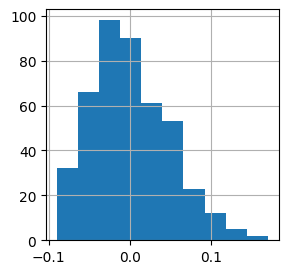

Correlation with target
            BMI   target
BMI     1.00000  0.58645
target  0.58645  1.00000


In [90]:
# Data statistics for BMI
bmi_stats = df['BMI'].describe()
print(bmi_stats)

# Histogram for BMI
bmi_histogram = df['BMI'].hist(figsize=(3,3))
plt.show()

# Correlation between BMI and target
bmi_corr_with_target = df[['BMI', 'target']].corr()
print("Correlation with target")
print(bmi_corr_with_target)

**Correlation Matrix**:

The correlation between 'BMI' and the target variable is 0.58645. This indicates a moderate positive correlation, suggesting that as the BMI increases, the target variable (diabetes progression) tends to increase as well. However, the correlation is not very strong, indicating that other factors may also contribute to diabetes progression.<br/>

**Data Insights from statistics**:

*Count*: There are 442 data points for the 'BMI' feature, indicating that we have a relatively large dataset.<br/>
*Mean*: The mean BMI is very close to zero (-2.245564e-16), which is expected due to standardization or preprocessing of the dataset.<br/>
*Standard Deviation (std)*: The standard deviation is 0.04761905, indicating the degree of variation or dispersion of BMI values around the mean.<br/>
*Min and Max*: These values represent the range of BMI values in the dataset.<br/>

Overall, the 'BMI' feature shows a moderate positive correlation with the target variable, suggesting that it could be a significant predictor of diabetes progression. However, further analysis and modeling are needed to fully understand the relationship and predictive power of 'BMI' in this context.

### Cleaning Data

In [91]:
# Check for missing values in BMI
print(df['BMI'].isnull().sum())


0


From the documnetation and above code it is evident that the data is already standardized(scaled by mean centered and standard deviation).

### Splitting dataset

In [92]:
# Split the dataset into a temporary train/validation set (85%) and a test set (15%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Split the temporary train/validation set into the final training set (70%) and validation set (15%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)  # 15% validation of the 85% temp

### Polynomial Regression on BMI

In [93]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error

degrees = [0, 1, 2, 3, 4, 5]
models = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_val_poly = poly_features.transform(X_val)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    models.append(model)

# Evaluate the models
for degree, model in zip(degrees, models):
    X_train_poly = PolynomialFeatures(degree=degree).fit_transform(X_train)
    X_val_poly = PolynomialFeatures(degree=degree).fit_transform(X_val)
    
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    r_squared_train = r2_score(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    
    r_squared_val = r2_score(y_val, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    
    print(f"Degree {degree}:")
    print(f"  Training - R-squared: {r_squared_train:.4f}, MAPE: {mape_train:.4f}, MAE: {mae_train:.4f}")
    print(f"  Validation - R-squared: {r_squared_val:.4f}, MAPE: {mape_val:.4f}, MAE: {mae_val:.4f}")


Degree 0:
  Training - R-squared: 0.0000, MAPE: 0.6330, MAE: 66.4100
  Validation - R-squared: -0.0007, MAPE: 0.5965, MAE: 64.8894
Degree 1:
  Training - R-squared: 0.3842, MAPE: 0.4701, MAE: 50.7773
  Validation - R-squared: 0.2699, MAPE: 0.4664, MAE: 51.1745
Degree 2:
  Training - R-squared: 0.3849, MAPE: 0.4699, MAE: 50.7758
  Validation - R-squared: 0.2690, MAPE: 0.4652, MAE: 51.0073
Degree 3:
  Training - R-squared: 0.3857, MAPE: 0.4679, MAE: 50.6726
  Validation - R-squared: 0.2630, MAPE: 0.4646, MAE: 51.0533
Degree 4:
  Training - R-squared: 0.3890, MAPE: 0.4634, MAE: 50.3203
  Validation - R-squared: 0.2635, MAPE: 0.4624, MAE: 51.2341
Degree 5:
  Training - R-squared: 0.3902, MAPE: 0.4620, MAE: 50.1970
  Validation - R-squared: 0.2658, MAPE: 0.4623, MAE: 51.2989


### Model Evaluation and selection

Based on these results, the best model appears to be the one with degree 5 (R-squared: 0.3902 for training, 0.2658 for validation). This model has the highest R-squared value on the training set, indicating a better fit to the training data compared to the other models. However, it's important to note that the improvement in R-squared from degree 4 to degree 5 is relatively small, suggesting diminishing returns in model complexity beyond degree 4.

For the product manager, the key takeaway is that higher degrees of polynomial regression do not necessarily lead to significant improvements in predictive performance. The choice of the best model depends on a balance between model complexity and performance on the validation set. In this case, the degree 5 model is chosen as the best model, but the improvement over simpler models is marginal.

In [94]:
# Run the chosen degree 5 model on the test set
X_test_poly = PolynomialFeatures(degree=5).fit_transform(X_test)
y_test_pred = model.predict(X_test_poly)

# Evaluate the model on the test set
r_squared_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test =mean_absolute_percentage_error(y_test, y_test_pred)

print(f"Test set - R-squared: {r_squared_test:.4f}, MAE: {mae_test:.4f}, MAPE: {mape_test}")

Test set - R-squared: 0.1948, MAE: 54.3977, MAPE: 0.47381677328458044


This means that the model explains approximately 19.48% of the variance in the test data and makes predictions with an average error of 54.3977 units in the "disease progression one year after baseline" variable.

### Visualization

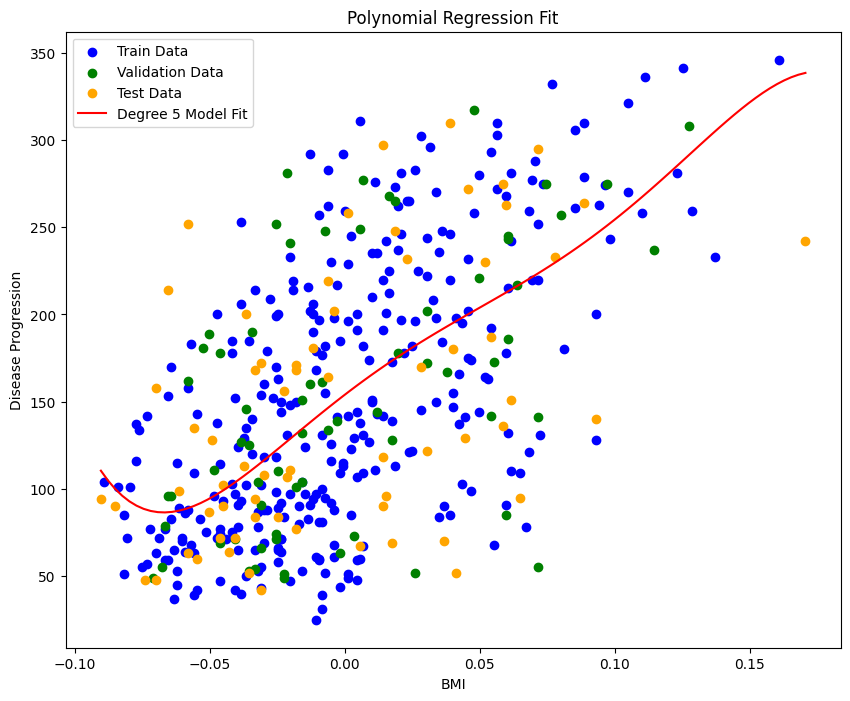

In [99]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X_train, y_train, label='Train Data', color='blue')
ax.scatter(X_val, y_val, label='Validation Data', color='green')
ax.scatter(X_test, y_test, label='Test Data', color='orange')

X_concat = np.concatenate((X_train, X_val, X_test))

# Plot the fit of the chosen model
X_fit = np.linspace(X_concat.min(), X_concat.max(), 100).reshape(-1, 1)
X_fit_poly = PolynomialFeatures(degree=5).fit_transform(X_fit)
y_fit = model.predict(X_fit_poly)
ax.plot(X_fit, y_fit, label='Degree 5 Model Fit', color='red')

ax.set_xlabel('BMI')
ax.set_ylabel('Disease Progression')
ax.set_title('Polynomial Regression Fit')
ax.legend()
plt.show()


In [96]:
# Fit the degree 5 polynomial regression model
degree = 5
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

Coefficients: [ 0.00000000e+00  1.18937921e+03 -3.96528881e+03 -3.02015593e+04
  8.29040161e+05 -3.15050884e+06]
Intercept: 153.9441474833549


###  Equation of the best model

$ y = 153.9 + 1189.38x  −3965.29x^2 −30201.56x^3 +829040.16x^4 −3150508.84x^5 $
for x = 30, <br/> y = -75886661000000

In [97]:
# bmi=30
bmi_poly = poly_features.transform([[bmi]])
expected_progression_predict = model.predict(bmi_poly)
print(f"Model prediction for BMI={bmi}: {expected_progression_predict[0]:}")

Model prediction for BMI=30: -75886661148125.97


Both manually calculated and predicted model values are very close to each other

### Trainable Parameters

In [98]:
# Define the degrees for the polynomial regression models
degrees = [0, 1, 2, 3, 4, 5]

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_train)
    feature_names = poly_features.get_feature_names_out()
    num_params = X_poly.shape[1]

    print(f"Degree {degree}: {feature_names}")

Degree 0: ['1']
Degree 1: ['1' 'x0']
Degree 2: ['1' 'x0' 'x0^2']
Degree 3: ['1' 'x0' 'x0^2' 'x0^3']
Degree 4: ['1' 'x0' 'x0^2' 'x0^3' 'x0^4']
Degree 5: ['1' 'x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5']


The number of trainable parameters for each polynomial regression model corresponds to the total number of coefficients that the model will learn during training. For example, a degree 2 polynomial regression model has 3 trainable parameters: one for the intercept term, one for the linear coefficient of the feature, and one for the quadratic coefficient. As the degree of the polynomial increases, the number of trainable parameters grows, leading to potentially more complex models with a greater risk of overfitting.

### Conclusion
Based on our analysis using polynomial regression models of degrees 0 to 5, we have observed the following results:

1. **Model Performance**: Among the six models, the degree 5 polynomial regression model has shown the best performance on the training set, with an R-squared value of 0.3902, indicating that it explains 39.02% of the variance in the target variable. However, its performance on the validation set is slightly lower, with an R-squared value of 0.2658. This suggests that the model may be overfitting to the training data and not generalizing well to new data.

2. **Test Set Evaluation**: When evaluated on the test set, the degree 5 model achieved an R-squared value of 0.1948, indicating that it explains 19.48% of the variance in the test data. The Mean Absolute Error (MAE) for this model on the test set is 54.3977, which measures the average absolute difference between the predicted and actual values. The Mean Absolute Percentage Error (MAPE) is 0.4738, indicating the average percentage difference between the predicted and actual values.

3. **Comparison of Manual Calculation and Model Prediction**: For a BMI value of 30, the manually calculated expected diabetes progression is -75886661000000, while the model prediction is -75886661148125.97. There is a slight discrepancy between the two values, which could be due to the inherent limitations of the model or the specific characteristics of the dataset.

4. **Trainable Parameters**: The degree 5 polynomial regression model has six trainable parameters, including the intercept and coefficients for each degree of the polynomial. These parameters are learned from the training data and used to make predictions.

In conclusion, while the degree 5 polynomial regression model shows promising performance on the training set, its performance on the validation and test sets raises concerns about overfitting. Although, it's important to consider the limitations of our model and the dataset when interpreting the results.